In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
%matplotlib inline
warn.filterwarnings('ignore')

In [195]:
movies_data = pd.read_csv('/Users/Jawahar/Desktop/Programming/Python Data Science/MoviesDataset.csv', encoding="latin1")

In [196]:
movies_data['Day of Week'] = movies_data['Day of Week'].astype('category')
movies_data['Genre'] = movies_data['Genre'].astype('category')
movies_data['Studio'] = movies_data['Studio'].astype('category')
movies_data.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [197]:
genre_filter = movies_data[(movies_data.Genre == 'action') | (movies_data.Genre == 'comedy') | (movies_data.Genre == 'adventure') | (movies_data.Genre == 'animation') | (movies_data.Genre == 'drama')]
studio_genre_filter = genre_filter[(genre_filter.Studio == 'Buena Vista Studios') | (genre_filter.Studio == 'Sony') | (genre_filter.Studio == 'Universal') | (genre_filter.Studio == 'WB') | (genre_filter.Studio == 'Paramount Pictures') | (genre_filter.Studio == 'Fox')]

studio_genre_filter.Genre.cat.remove_unused_categories(inplace = True)
studio_genre_filter.Studio.cat.remove_unused_categories(inplace = True)
studio_genre_filter

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
14,Friday,Ryan Murphy,drama,Eat Pray Love,13/08/2010,Sony,223.1,60.0,204.6,5.6,2.84,124,60.6,144.6,241.0,133,80.6,39.4


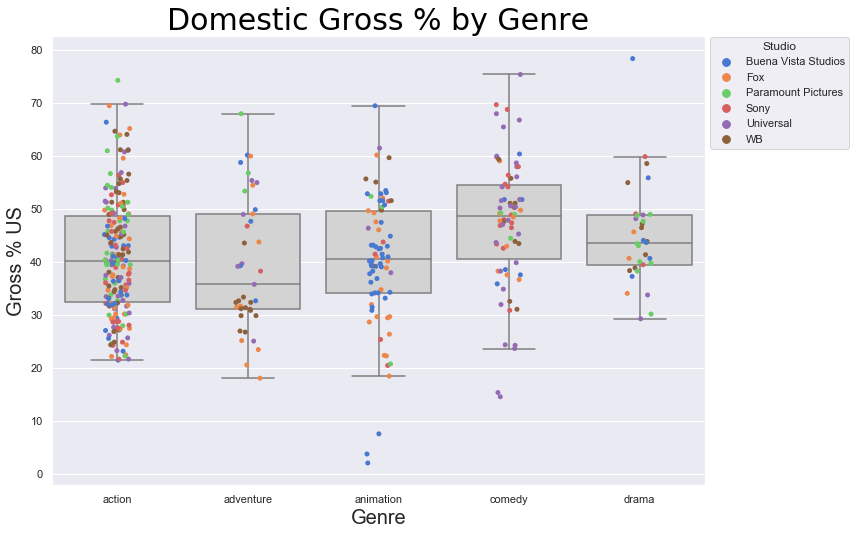

In [201]:
f, axes = plt.subplots()
f.set_size_inches(11.7, 8.27)

sns.set(style="darkgrid", palette="muted", color_codes=True)

#showfliers removes outliers
boxplot = sns.boxplot(data=studio_genre_filter, x='Genre', y='Gross % US', showfliers=False, color='lightgray')
stripplot = sns.stripplot(data=studio_genre_filter, x='Genre', y='Gross % US', hue='Studio')

axes.set_title('Domestic Gross % by Genre', fontsize=30, color='Black', fontname='Calibri body')
axes.set_ylabel('Gross % US', fontsize=20)
axes.set_xlabel('Genre', fontsize=20)
axes.legend(loc=2, bbox_to_anchor=(1,1.01), title='Studio')

plt.show()